In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_poly = pd.read_csv("boston_polynomial.csv")
df_poly.head()

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


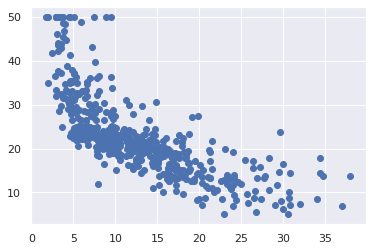

In [4]:
# 1. Define x= np.array(df_poly['LSTAT']) and  y= np.array(df_poly['price'])
x= np.array(df_poly['LSTAT'])
y= np.array(df_poly['price'])

# Draw a scatter plot for price vs LSTAT using x and y. (5 points)
plt.scatter(x,y)
plt.show()

###  Polynomial transformation of the data

In [5]:
type(x)
x[0:5]

array([4.98, 9.14, 4.03, 2.94, 5.33])

In [6]:
x.reshape(-1,1) [0:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [7]:
# 2. Now fit_transform your x and call it X_poly. Set polynomial degree = 5.  (5 points)  
poly = PolynomialFeatures(degree =5)

X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


###  Splitting the data

In [28]:
# 3. Split the data into test (30%) and train set (70%) (5 points)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1000)

In [29]:
X_train.head()

,0,1,2,3,4,5
266,1.0,14.79,218.7441,3235.225239,47848.981285,707686.433202
363,1.0,14.64,214.3296,3137.785344,45937.177436,672520.277665
78,1.0,12.34,152.2756,1879.080904,23187.858355,286138.172105
180,1.0,7.56,57.1536,432.081216,3266.533993,24694.996987
229,1.0,3.76,14.1376,53.157376,199.871734,751.517719


###  Train the data

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# 4. Save the predicted values for the test set in y_hat_test. (5 points)
y_hat_test = model.predict(X_test)

In [32]:
# Construct a data frame named predictions which has 3 columns. y_test, y_hat_test , resid.(5 points)
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
df_predictions.head()

,y_test,y_hat_test,resid
0,21.8,21.514132,0.285868
1,10.2,18.150191,-7.950191
2,15.2,16.197956,-0.997956
3,43.5,40.765901,2.734099
4,50.0,22.373052,27.626948


In [33]:
# Report the RMSE_test (RMSE in the test set)  (5 points)
err_te= y_test - y_hat_test
MSE_test = np.mean(np.square(err_te))
round(MSE_test,2)
print(np.sqrt(MSE_test))

5.204155174286748


### Cross validation

In [14]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [15]:
model = LinearRegression()

In [16]:
# 5. Estimate the RMSE_test using K-Fold Cross Validation technique (K=5 only) and name it as RMSE_CV5. (10 points)
NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

MSE_CV5= np.mean(-NMSE)

RMSE_CV5 = np.sqrt(-NMSE).mean()
RMSE_CV5

4.770598838171108

### Plot the test MSE using 5-fold cross validation.

In [17]:
RMSE_CV5=[]
iterator= range(1,15) # the second number is polynomial degree 
for i in iterator:
    X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=i).fit_transform(x.reshape(-1,1)), y, test_size=0.3, random_state=100)
    MSE = -cross_val_score(estimator = LinearRegression() , X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV5.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame({'Poly degree':iterator, 'RMSE_CV5':RMSE_CV5 })
output

,Poly degree,RMSE_CV5
0,1,5.924507
1,2,5.135839
2,3,4.963838
3,4,4.832973
4,5,4.770599
5,6,4.728260
6,7,4.733115
7,8,4.792693
8,9,4.895323
9,10,5.172738


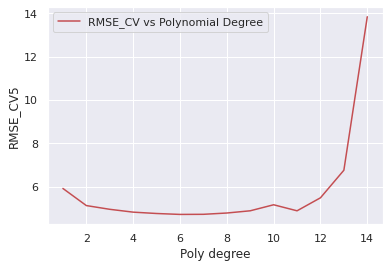

In [18]:
sns.lineplot(x='Poly degree', y='RMSE_CV5', data=output , color='r', label="RMSE_CV vs Polynomial Degree")
plt.show()

### All in one function

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test

    


In [20]:
my_polynomial_regression(poly_degree=5,X=x,y=y)

(5, 4.72, 6.15)

In [21]:
my_polynomial_regression(poly_degree=1, X=x, y=y)

(1, 5.92, 6.88)

In [22]:
# 6. Use my_polynomial_regression() function from the notebook for class 7.
# With that function, construct a table with 3 columns: Degree (going from 1 to 10), RMSE_train and RMSE_test. (10 points)

returns= []
for i in range(1,11):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,5.92,6.88
1,2,5.13,6.32
2,3,4.95,6.26
3,4,4.82,6.16
4,5,4.72,6.15
5,6,4.70,6.17
6,7,4.69,6.17
7,8,4.69,6.16
8,9,4.69,6.15
9,10,4.69,6.15


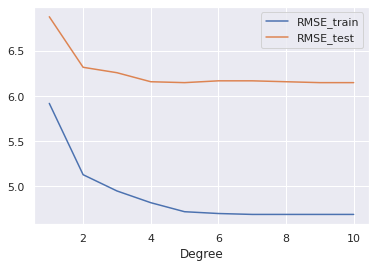

In [23]:
# 7. Use the table from part 6 and plot the RMSE_test and RMSE_train against the Degree on the horizontal axis.  (5 points)

output.set_index('Degree').plot()
plt.show()

In [24]:
# 8. What is the optimal polynomial degree based on your observations from the above table and chart in part 6 and 7 respectively.
# Explain your answer (5 points) This is called elbow method by the way!
print(output[output.RMSE_test == output.RMSE_test.min()])

   Degree  RMSE_train  RMSE_test
4       5        4.72       6.15
8       9        4.69       6.15
9      10        4.69       6.15
